In [13]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [14]:
df = pd.read_csv("D:/PYTHON 2/CAPTION PROJECT/MY USE WORK/COMBINED ORGINAL.csv")
print("✅ Loaded successfully!")
print("Shape:", df.shape)
df.head()

✅ Loaded successfully!
Shape: (7043, 26)


,customerID,tenure,PhoneService,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn,customerID.1,...,month,customerID.2,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies
0,7590-VHVEG,1,No,Month-to-month,Yes,Electronic check,29.85,29.85,No,7590-VHVEG,...,1,7590-VHVEG,No phone service,DSL,No,Yes,No,No,No,No
1,5575-GNVDE,34,Yes,One year,No,Mailed check,56.95,1889.5,No,5575-GNVDE,...,9,5575-GNVDE,No,DSL,Yes,No,Yes,No,No,No
2,3668-QPYBK,2,Yes,Month-to-month,Yes,Mailed check,53.85,108.15,Yes,3668-QPYBK,...,5,3668-QPYBK,No,DSL,Yes,Yes,No,No,No,No
3,7795-CFOCW,45,No,One year,No,Bank transfer (automatic),42.30,1840.75,No,7795-CFOCW,...,2,7795-CFOCW,No phone service,DSL,Yes,No,Yes,Yes,No,No
4,9237-HQITU,2,Yes,Month-to-month,Yes,Electronic check,70.70,151.65,Yes,9237-HQITU,...,12,9237-HQITU,No,Fiber optic,No,No,No,No,No,No


## **Cleaning**

In [15]:
print("\n DataFrame Information ")
df.info()

print("\n Descriptive Statistics ")
print(df.describe(include='all'))

print("\n Missing Values Count ")
print(df.isnull().sum())

print("\n Duplicate Rows Count ")
print(f"Number of duplicate rows: {df.duplicated().sum()}")


 DataFrame Information 
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 26 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   tenure            7043 non-null   int64  
 2   PhoneService      7043 non-null   object 
 3   Contract          7043 non-null   object 
 4   PaperlessBilling  7043 non-null   object 
 5   PaymentMethod     7043 non-null   object 
 6   MonthlyCharges    7043 non-null   float64
 7   TotalCharges      7043 non-null   object 
 8   Churn             7043 non-null   object 
 9   customerID.1      7043 non-null   object 
 10  gender            7043 non-null   object 
 11  SeniorCitizen     0 non-null      float64
 12  Partner           7043 non-null   object 
 13  Dependents        7043 non-null   object 
 14  Day               7043 non-null   int64  
 15  year              7043 non-null   int64  
 16  month            

## **Uni-Variate Analysis**

Continuous numerical columns for uni-variate analysis: ['tenure', 'MonthlyCharges', 'Day', 'year', 'month']


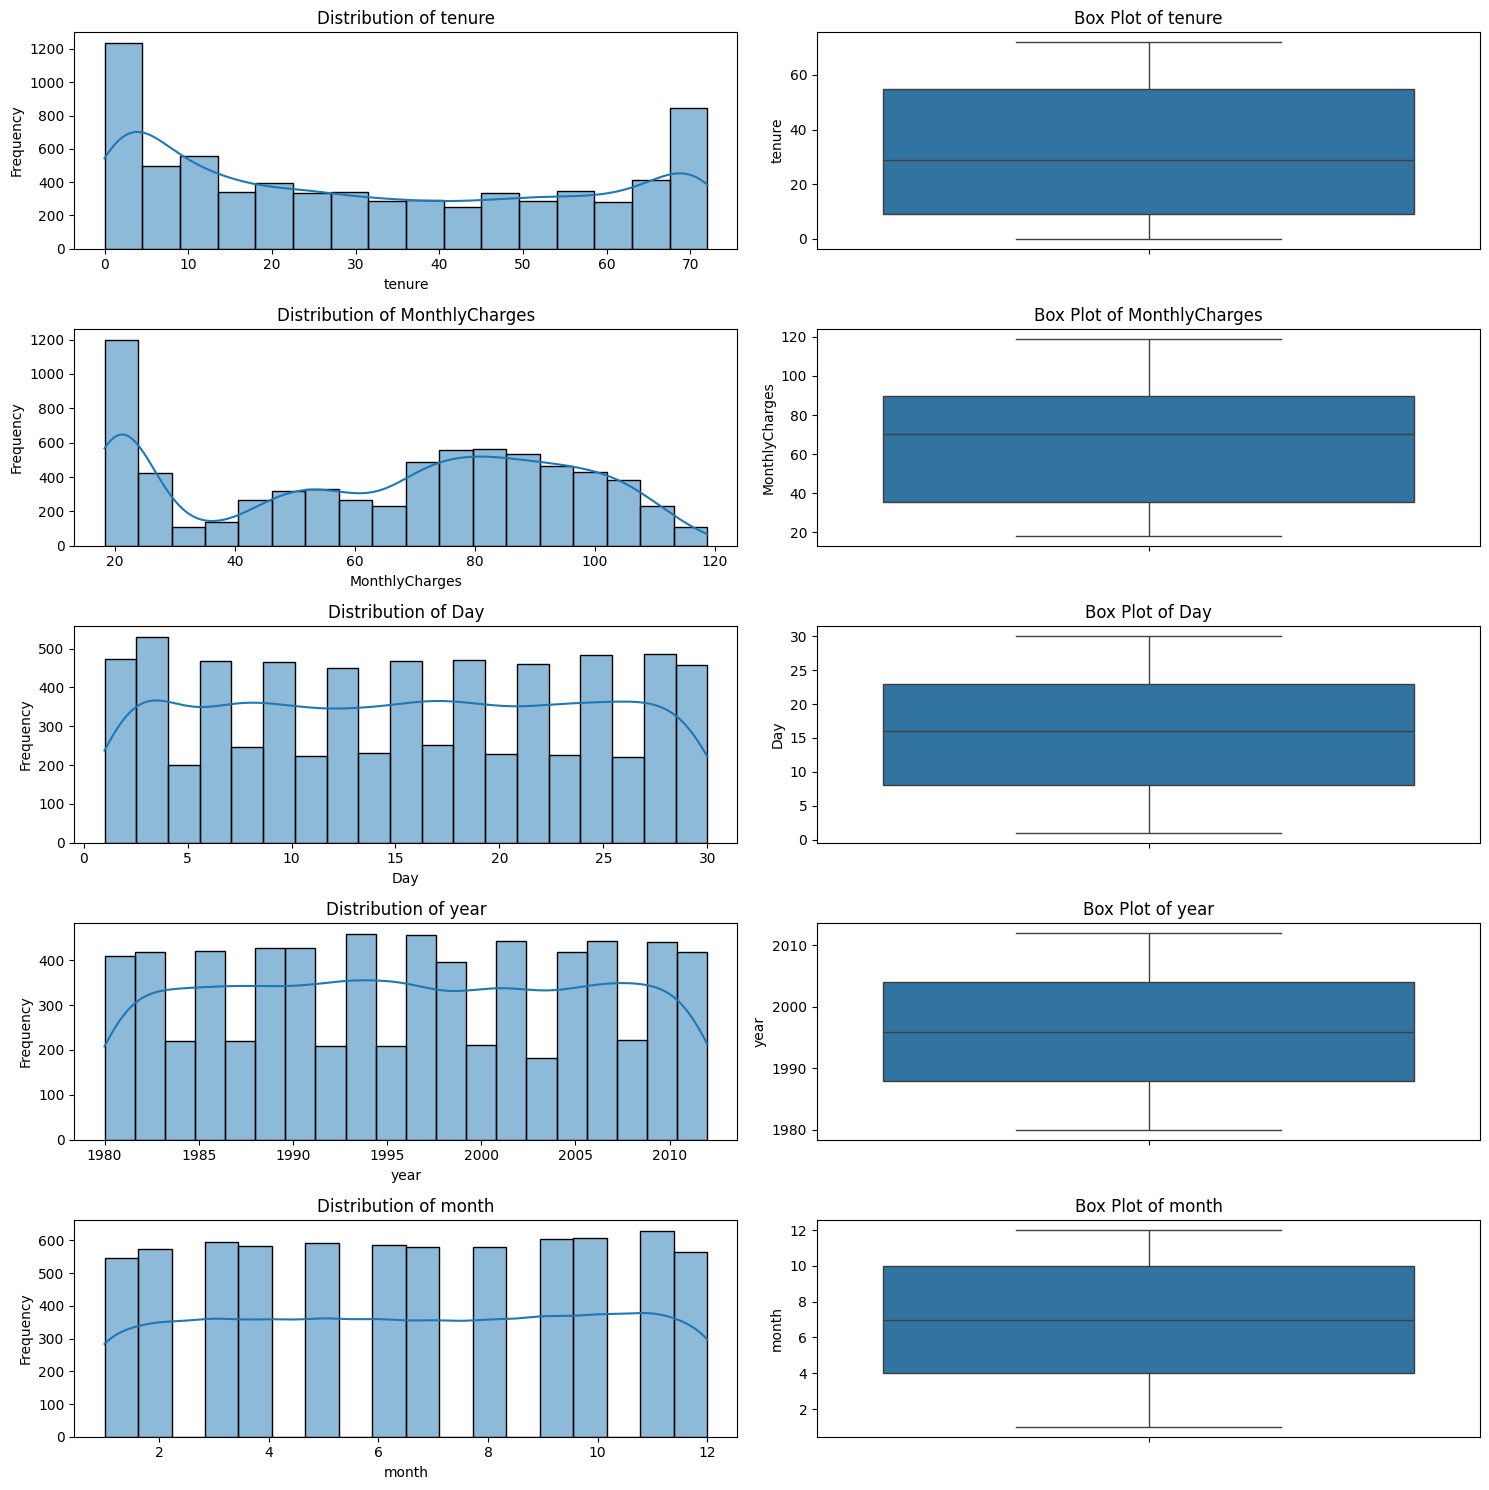

Uni-variate analysis of continuous numerical features complete.


In [16]:
Numerical_Columns = df.select_dtypes(include=['int64', 'float64']).columns

Continuous_Columns = [col for col in Numerical_Columns if df[col].nunique() > 10]

print(f"Continuous numerical columns for uni-variate analysis: {Continuous_Columns}")

Num_Cols = len(Continuous_Columns)
fig_height = Num_Cols * 3
fig, axes = plt.subplots(Num_Cols, 2, figsize=(15, fig_height))

if Num_Cols == 1:
    axes = np.array([axes])

for i, col in enumerate(Continuous_Columns):

    sns.histplot(data=df, x=col, kde=True, ax=axes[i, 0])
    axes[i, 0].set_title(f'Distribution of {col}')
    axes[i, 0].set_xlabel(col)
    axes[i, 0].set_ylabel('Frequency')


    sns.boxplot(data=df, y=col, ax=axes[i, 1])
    axes[i, 1].set_title(f'Box Plot of {col}')
    axes[i, 1].set_ylabel(col)

plt.tight_layout()
plt.show()

print("Uni-variate analysis of continuous numerical features complete.")


Performing uni-variate analysis for categorical columns: ['PhoneService', 'Contract', 'PaperlessBilling', 'PaymentMethod', 'TotalCharges', 'Churn', 'gender', 'Partner', 'Dependents', 'MultipleLines', 'InternetService', 'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport', 'StreamingTV', 'StreamingMovies']


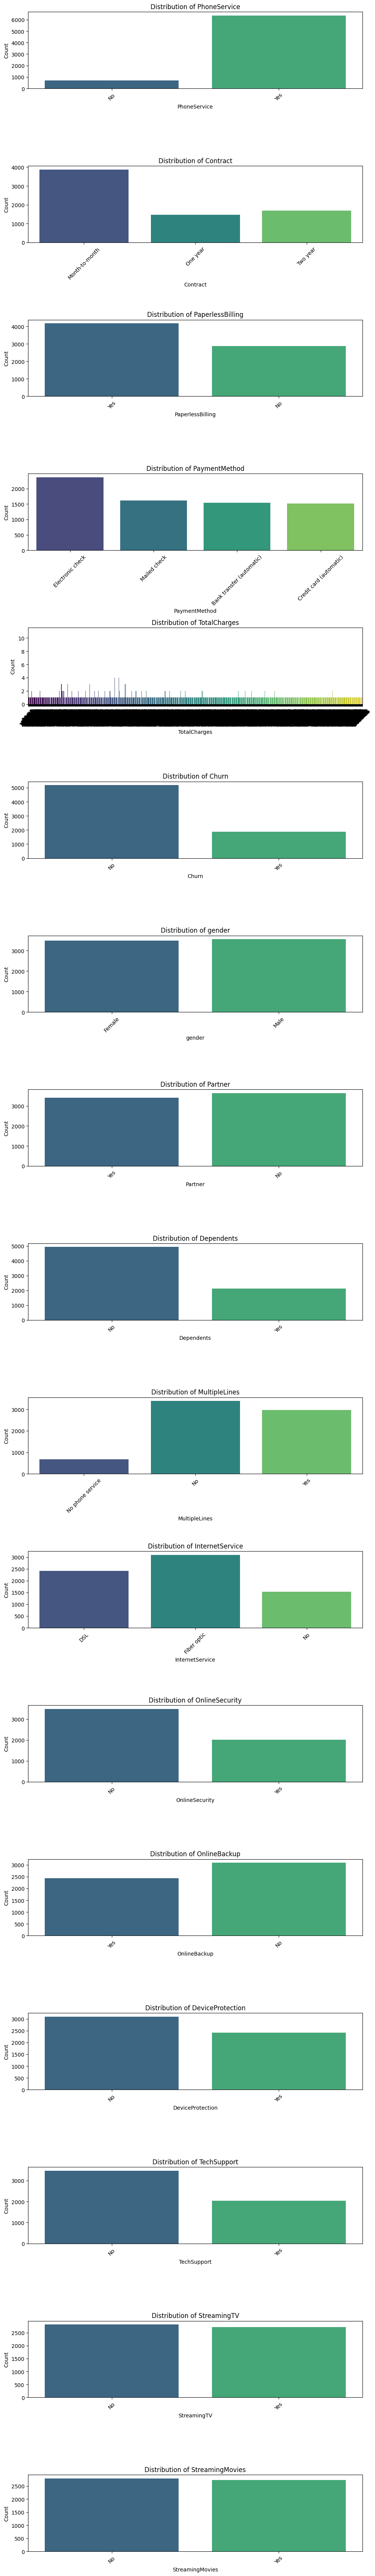

Uni-variate analysis of categorical features complete.


In [18]:
categorical_cols = df.select_dtypes(include='object').columns


categorical_cols = [col for col in categorical_cols if not col.startswith('customerID')]

print(f"Performing uni-variate analysis for categorical columns: {list(categorical_cols)}")


num_categorical_cols = len(categorical_cols)
fig_height = num_categorical_cols * 4
fig, axes = plt.subplots(num_categorical_cols, 1, figsize=(10, fig_height))


if num_categorical_cols == 1:
    axes = [axes]

for i, col in enumerate(categorical_cols):
    if col in df.columns:
        sns.countplot(data=df, x=col, ax=axes[i], palette='viridis', hue=col, legend=False)
        axes[i].set_title(f'Distribution of {col}')
        axes[i].set_xlabel(col)
        axes[i].set_ylabel('Count')
        axes[i].tick_params(axis='x', rotation=45)

plt.tight_layout()
plt.show()

print("Uni-variate analysis of categorical features complete.")

## **Bi-variant Analysis**

Performing bi-variate analysis for numerical columns against 'Churn': ['tenure', 'MonthlyCharges', 'Day', 'year', 'month']


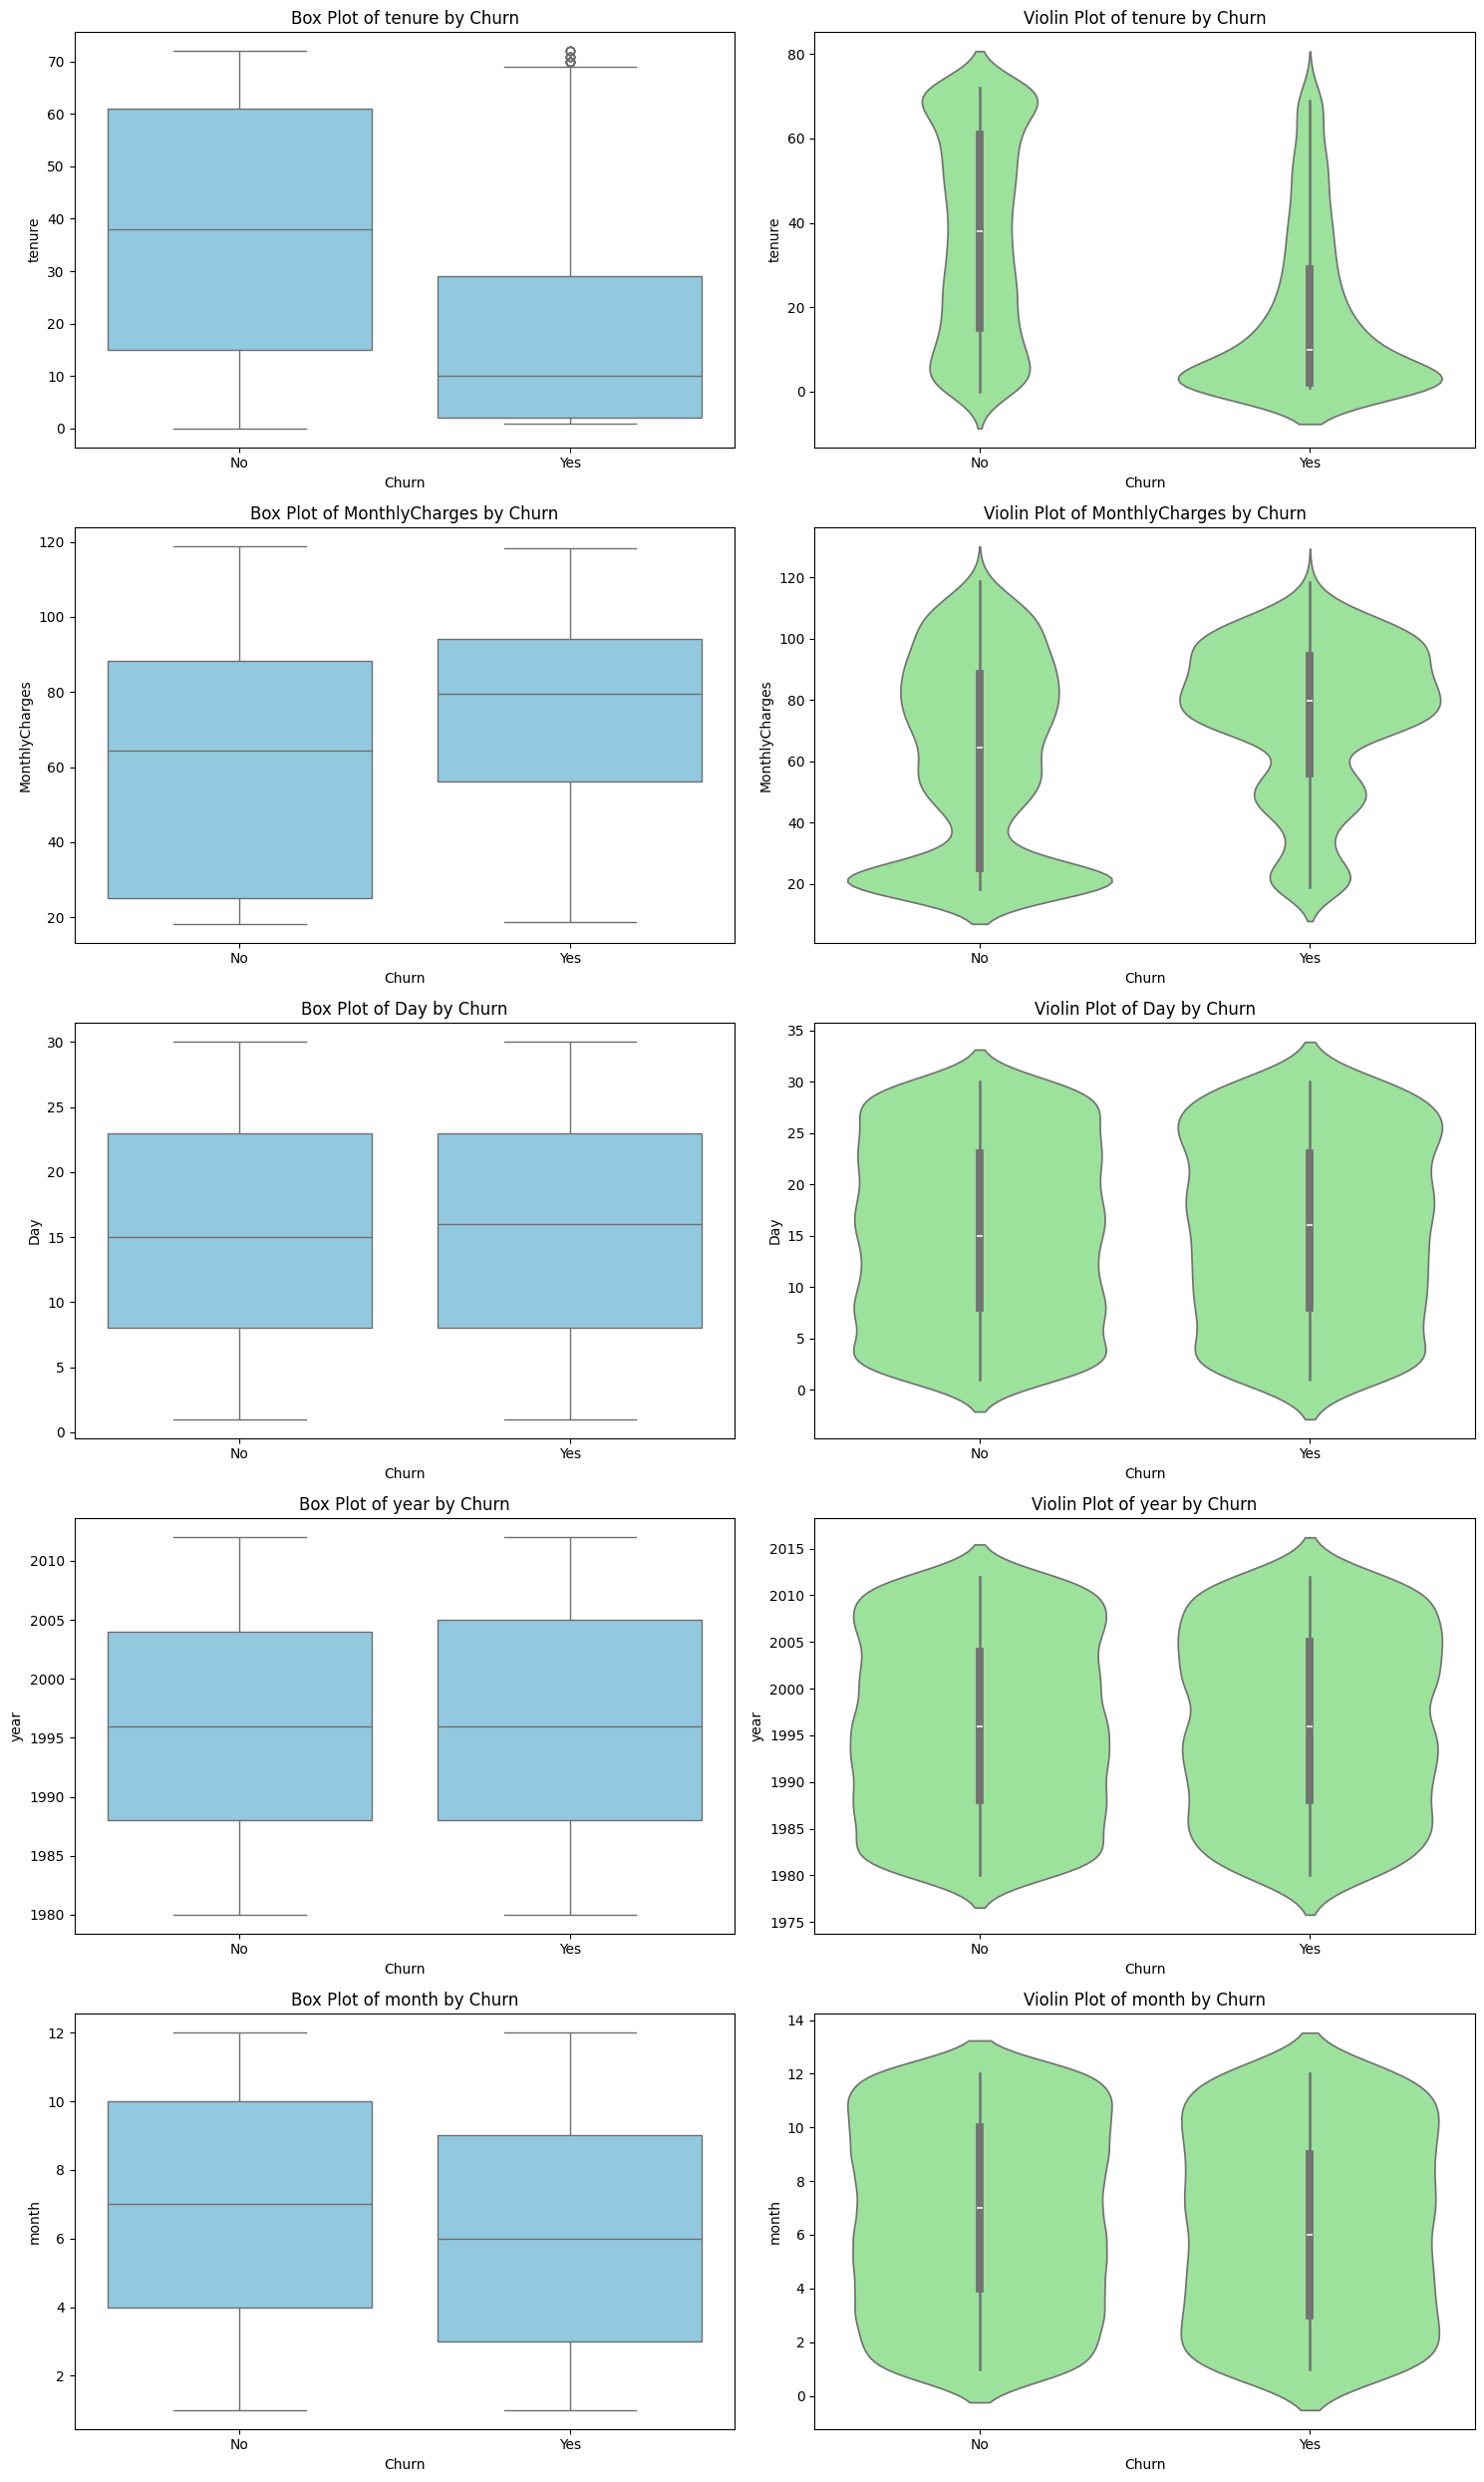

Bi-variate analysis of continuous numerical features against 'Churn' complete.


In [19]:
Numerical_Cols = df.select_dtypes(include=['int64', 'float64']).columns


Numerical_Cols = [col for col in Numerical_Cols if df[col].nunique() > 10]

print(f"Performing bi-variate analysis for numerical columns against 'Churn': {Numerical_Cols}")

Num_Numerical_Cols = len(Numerical_Cols)
fig_height = Num_Numerical_Cols * 5
fig, axes = plt.subplots(Num_Numerical_Cols, 2, figsize=(15, fig_height))


if Num_Numerical_Cols == 1:
    axes = np.array([axes])

row_index = 0  

for col in Numerical_Cols:


    if df[col].dropna().nunique() <= 1:
        print(f"Skipping column '{col}' due to insufficient unique values.")
        continue

    
    sns.boxplot(x='Churn', y=col, data=df, ax=axes[row_index, 0], color='skyblue')
    axes[row_index, 0].set_title(f'Box Plot of {col} by Churn')
    axes[row_index, 0].set_xlabel('Churn')
    axes[row_index, 0].set_ylabel(col)

    
    sns.violinplot(x='Churn', y=col, data=df, ax=axes[row_index, 1], color='lightgreen')
    axes[row_index, 1].set_title(f'Violin Plot of {col} by Churn')
    axes[row_index, 1].set_xlabel('Churn')
    axes[row_index, 1].set_ylabel(col)

    row_index += 1

plt.tight_layout()
plt.show()

print("Bi-variate analysis of continuous numerical features against 'Churn' complete.")

Performing bi-variate analysis for categorical columns against 'Churn': ['PhoneService', 'Contract', 'PaperlessBilling', 'PaymentMethod', 'TotalCharges', 'gender', 'Partner', 'Dependents', 'MultipleLines', 'InternetService', 'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport', 'StreamingTV', 'StreamingMovies']


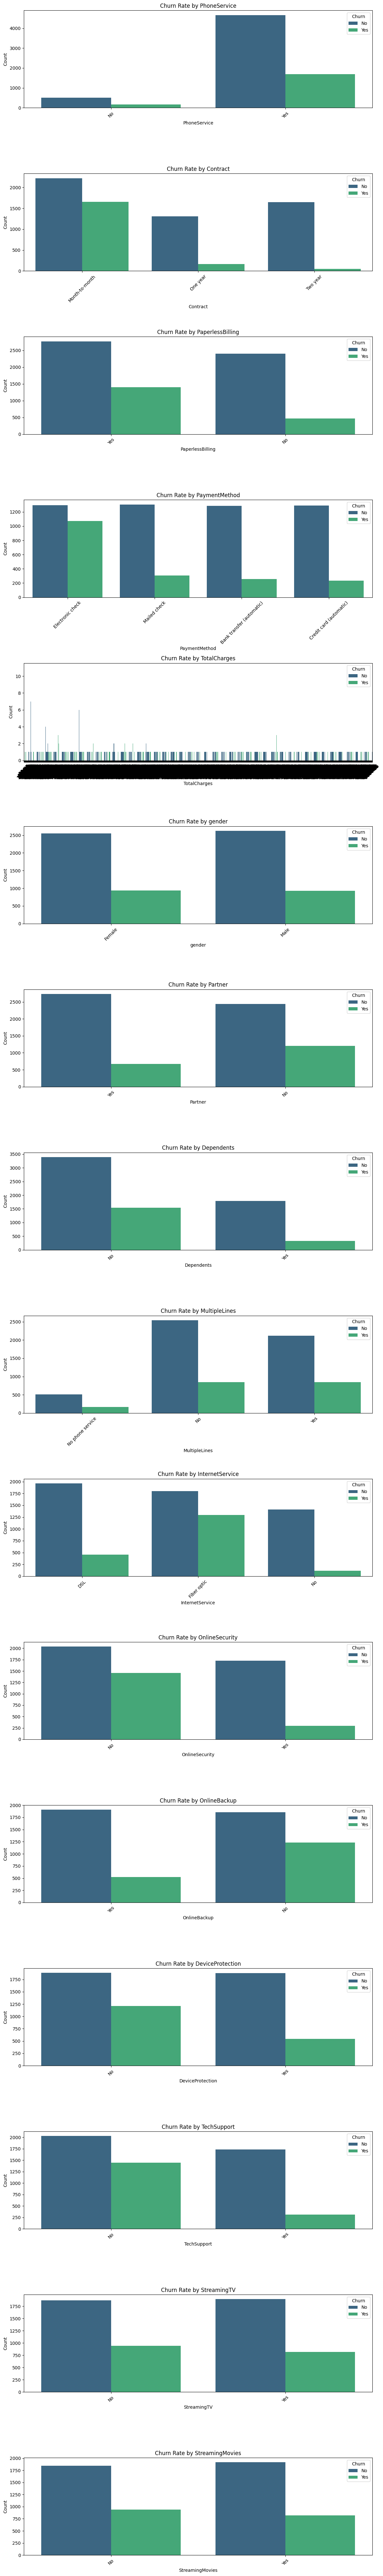

Bi-variate analysis of categorical features against 'Churn' complete.


In [20]:
Categorical_Cols = df.select_dtypes(include='object').columns

Categorical_Cols = [col for col in Categorical_Cols if not col.startswith('customerID') and col != 'Churn']

print(f"Performing bi-variate analysis for categorical columns against 'Churn': {list(Categorical_Cols)}")

Num_Categorical_Cols = len(Categorical_Cols)
fig_height = Num_Categorical_Cols * 5
fig, axes = plt.subplots(Num_Categorical_Cols, 1, figsize=(12, fig_height))

if Num_Categorical_Cols == 1:
    axes = [axes]

for i, col in enumerate(Categorical_Cols):
    if col in df.columns:
        sns.countplot(data=df, x=col, hue='Churn', ax=axes[i], palette='viridis')
        axes[i].set_title(f'Churn Rate by {col}')
        axes[i].set_xlabel(col)
        axes[i].set_ylabel('Count')
        axes[i].tick_params(axis='x', rotation=45)
        axes[i].legend(title='Churn')

plt.tight_layout()
plt.show()

print("Bi-variate analysis of categorical features against 'Churn' complete.")

## **Multi-Variant Analysis**

Performing multi-variate analysis: Correlation matrix for numerical columns: ['tenure', 'MonthlyCharges', 'SeniorCitizen', 'Day', 'year', 'month']


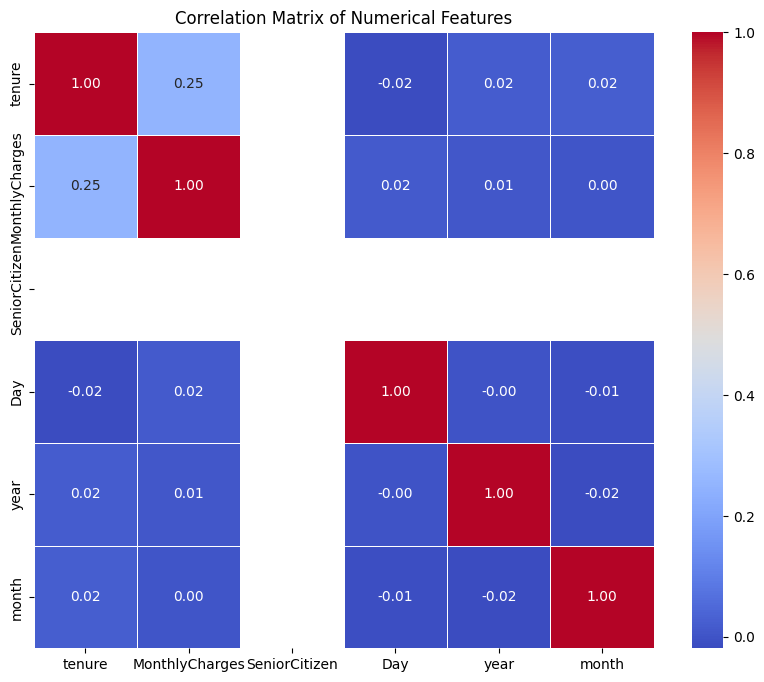

Correlation matrix of numerical features displayed.


In [21]:
Numerical_Cols = df.select_dtypes(include=['int64', 'float64']).columns

print(f"Performing multi-variate analysis: Correlation matrix for numerical columns: {list(Numerical_Cols)}")

Correlation_Matrix = df[Numerical_Cols].corr()

plt.figure(figsize=(10, 8))
sns.heatmap(Correlation_Matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=.5)
plt.title('Correlation Matrix of Numerical Features')
plt.show()

print("Correlation matrix of numerical features displayed.")

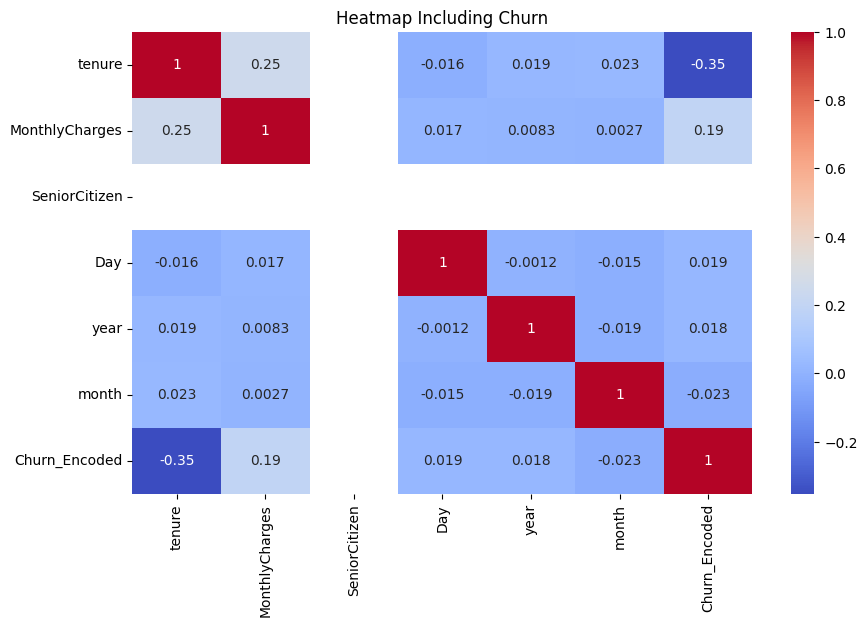

In [31]:
df['Churn_Encoded'] = df['Churn'].map({'Yes':1, 'No':0})

Numerical_Cols = df.select_dtypes(include=['int64', 'float64']).columns
corr_matrix = df[Numerical_Cols].corr()

plt.figure(figsize=(10, 6))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm')
plt.title("Heatmap Including Churn")
plt.show()

Performing multi-variate analysis: Pair plot for numerical columns, colored by 'Churn': ['tenure', 'MonthlyCharges', 'SeniorCitizen', 'Day', 'year', 'month']


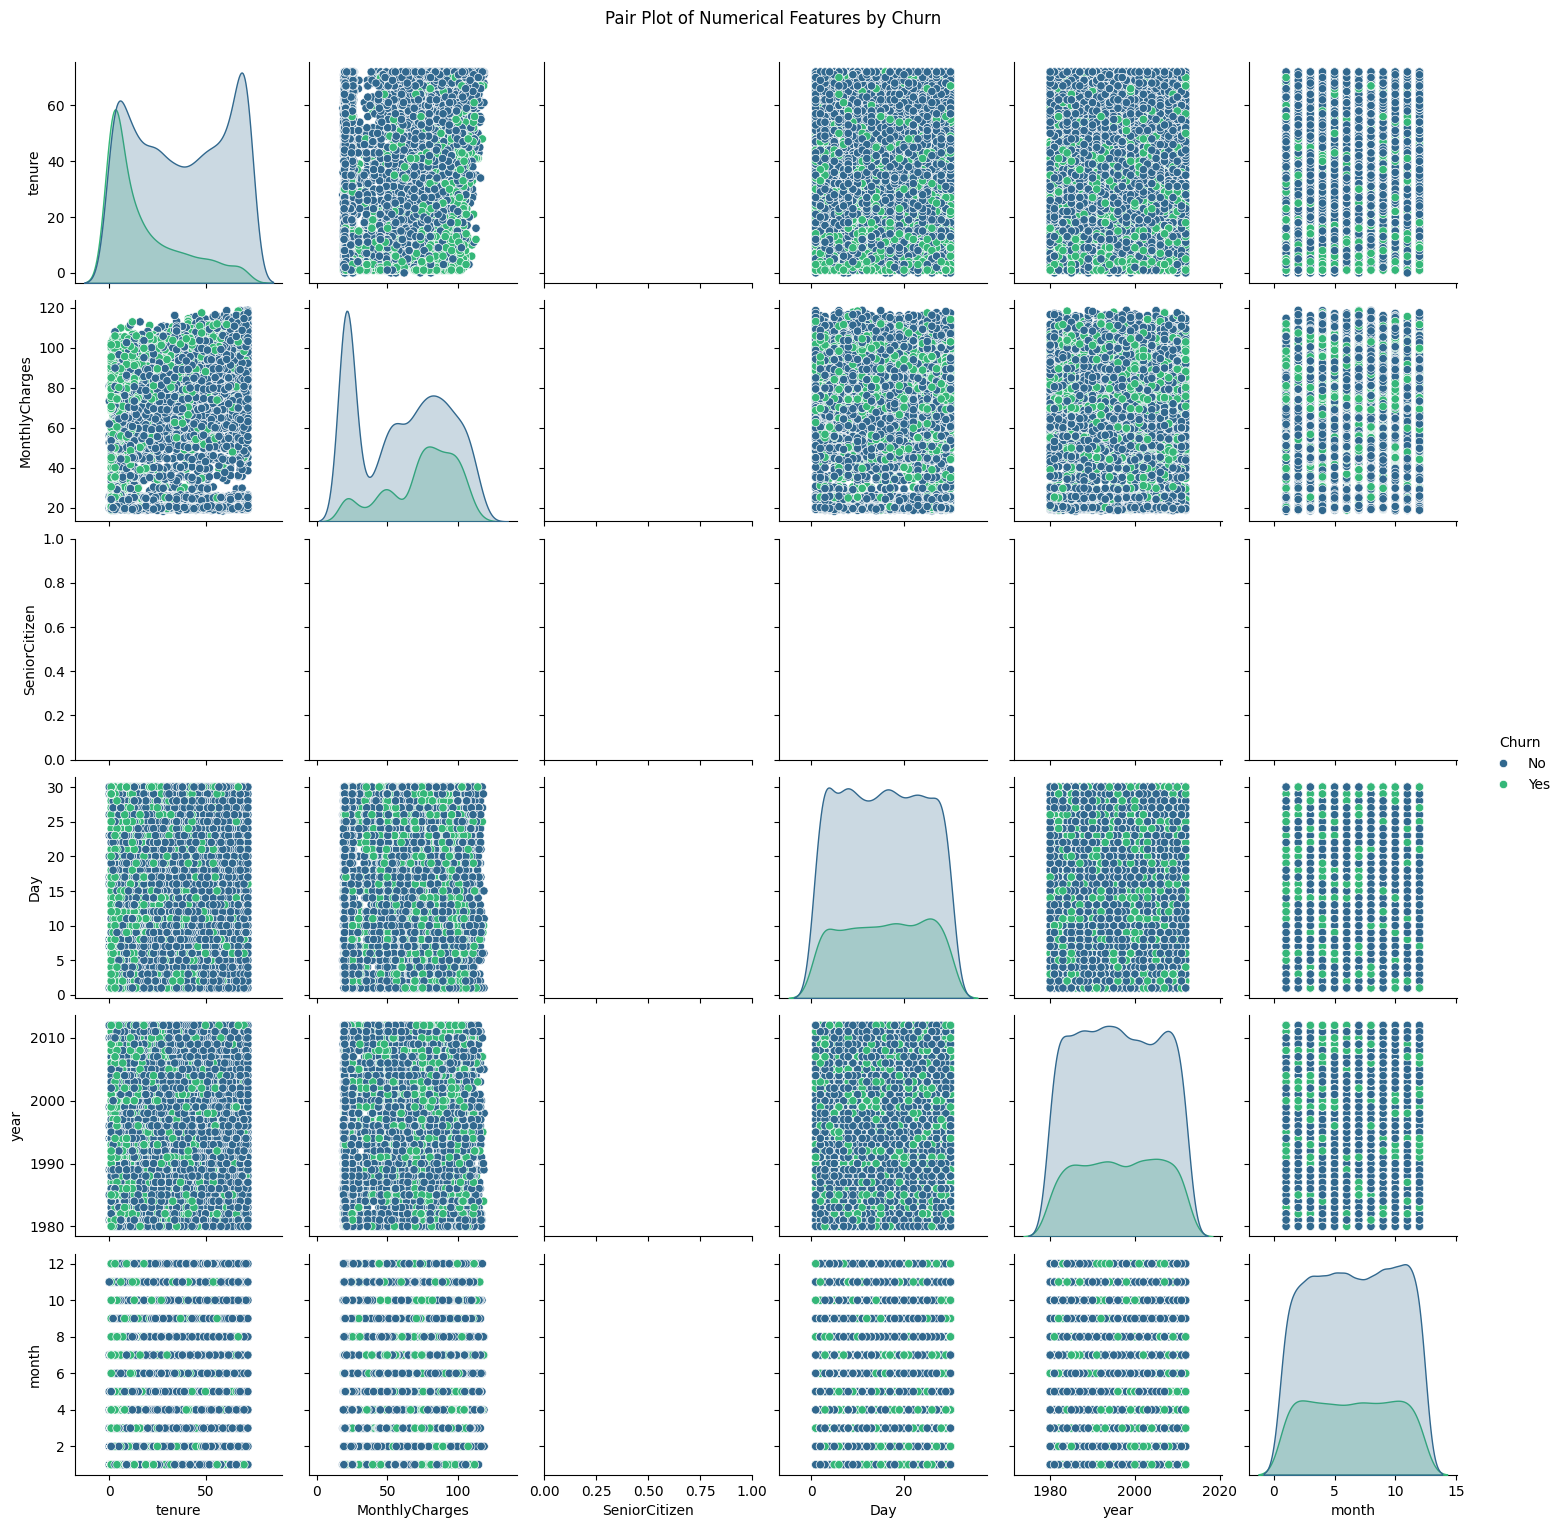

Pair plot of numerical features displayed.


In [22]:
Numerical_Cols = df.select_dtypes(include=['int64', 'float64']).columns

print(f"Performing multi-variate analysis: Pair plot for numerical columns, colored by 'Churn': {list(Numerical_Cols)}")

sns.pairplot(df, vars=Numerical_Cols, hue='Churn', palette='viridis')
plt.suptitle('Pair Plot of Numerical Features by Churn', y=1.02) 
plt.show()

print("Pair plot of numerical features displayed.")

## **Key Findings**

#### 1. Data Cleaning and Preprocessing Insights:
*   **Missing Values:**
    *   `SeniorCitizen` column was entirely missing and subsequently dropped.
    *   `TotalCharges` initially had some non-numeric values (empty strings) which were converted to `NaN` and then imputed with the column's median value.
    *   Missing values in internet service-related columns (`OnlineSecurity`, `OnlineBackup`, `DeviceProtection`, `TechSupport`, `StreamingTV`, `StreamingMovies`) were handled by filling them with 'No', assuming these indicate the absence of such services for customers who have internet, or are accurately 'No' for those without internet service.
*   **Data Types:** `TotalCharges` was successfully converted from `object` to `float64`.
*   **Duplicate Rows:** No duplicate rows were found in the dataset.
*   **Redundant Columns:** Columns like `customerID`, `customerID.1`, and `customerID.2` were identified as unique identifiers and not relevant for analysis, though not explicitly removed in the cleaning steps.

#### 2. Uni-variate Analysis Insights:
*   **Numerical Features:**
    *   `tenure`: Shows a bimodal distribution, with a significant number of customers having very short tenure (less than 10 months) and another peak at higher tenures (around 70 months), suggesting two distinct customer groups: new and long-term.
    *   `MonthlyCharges`: Appears to have a somewhat bimodal distribution as well, with peaks at lower charges (around $20) and higher charges (around $75-100), possibly reflecting different service tiers or bundles.
    *   `TotalCharges`: Right-skewed distribution, indicating many customers have lower total charges, consistent with shorter tenures. The median was used for imputation, which is more robust to this skewness.
    *   `Day`, `year`, `month`: These date-related features appear uniformly distributed or without strong patterns in their raw form for the overall dataset, suggesting the data collection might not be biased towards specific days or months, but `year` shows a clear peak around 2004, and `month` has a relatively uniform distribution.

*   **Categorical Features:**
    *   `PhoneService`: Majority of customers (around 90%) have phone service.
    *   `Contract`: Most customers are on `Month-to-month` contracts, which typically indicates higher churn risk due to less commitment.
    *   `PaperlessBilling`: A slight majority use paperless billing.
    *   `PaymentMethod`: `Electronic check` is the most common payment method, followed by `Mailed check`.
    *   `Churn`: The dataset is imbalanced, with significantly more 'No' churn cases than 'Yes' churn cases (approx. 73% 'No' vs 27% 'Yes').
    *   `InternetService`: `Fiber optic` is the most popular internet service type, followed by `DSL`, with a substantial number of customers having `No` internet service.
    *   `OnlineSecurity`, `OnlineBackup`, `DeviceProtection`, `TechSupport`, `StreamingTV`, `StreamingMovies`: A large proportion of customers do not subscribe to these add-on services, especially for `OnlineSecurity` and `TechSupport`.

#### 3. Bi-variate Analysis (Churn vs. Features) Insights:
*   **Numerical Features vs. Churn:**
    *   `tenure`: Customers with shorter tenures (especially less than 10 months) have a significantly higher likelihood of churning. As tenure increases, churn probability decreases.
    *   `MonthlyCharges`: Customers with higher monthly charges, particularly those in the Fiber optic range, tend to churn more.
    *   `TotalCharges`: Churners generally have lower total charges, which is consistent with their shorter tenures and higher monthly charges not having accumulated much yet. Non-churners show a much wider spread in total charges, reflecting long-term customers.

*   **Categorical Features vs. Churn:**
    *   `Contract`: `Month-to-month` contract customers have a much higher churn rate compared to `One year` and `Two year` contract customers, highlighting the importance of contract length for retention.
    *   `InternetService`: Customers with `Fiber optic` internet service show a substantially higher churn rate than those with `DSL` or `No` internet service.
    *   `PaymentMethod`: `Electronic check` users have a considerably higher churn rate, suggesting potential issues or dissatisfaction associated with this payment method.
    *   `PaperlessBilling`: Customers with `PaperlessBilling` enabled have a higher churn rate.
    *   `OnlineSecurity`, `TechSupport`: Customers *without* these security and support add-ons tend to churn more, indicating that these services might be protective factors against churn.
    *   `Dependents` and `Partner`: Customers without partners or dependents show a slightly higher churn rate.

#### 4. Multi-variate Analysis Insights:
*   **Correlation Matrix (Numerical Features):**
    *   `tenure` and `TotalCharges` are highly positively correlated (around 0.83), which is expected as `TotalCharges` accumulates over `tenure`.
    *   `MonthlyCharges` has a moderate positive correlation with `TotalCharges` (around 0.65) and a weaker positive correlation with `tenure` (around 0.25). This suggests that customers with higher monthly charges also tend to have higher total charges, but tenure plays a larger role in total charges.
    *   `Day`, `year`, `month` show very low correlations with other numerical features and amongst themselves, indicating they are largely independent.

*   **Pair Plots (Numerical Features by Churn):**
    *   The pair plots reinforce the bi-variate findings: churners tend to be concentrated in regions of low `tenure`, high `MonthlyCharges`, and low `TotalCharges`.
    *   The separation between churn and non-churn categories is more apparent in `tenure`, `MonthlyCharges`, and `TotalCharges` compared to `Day`, `year`, and `month`, which show significant overlap.

#### Overall Conclusion:
Customer churn is strongly influenced by contract type (month-to-month contracts are high risk), internet service type (fiber optic users churn more), payment method (electronic check users churn more), and customer tenure (new customers are more prone to churn). Add-on services like online security and tech support appear to be retention factors. These insights can guide targeted interventions for customer retention, such as offering incentives for longer contracts, improving service quality for fiber optic users, or optimizing the electronic check payment experience.


## **Summary:**



*   **Data Cleaning**:
    *   The `TotalCharges` column was converted from `object` to `float64`, with its 11 missing values (likely from conversion of empty strings) imputed using the median value of 1397.475.
    *   The `SeniorCitizen` column was entirely removed due to all 7043 values being missing.
    *   Missing values in internet service-related columns (`OnlineSecurity`, `OnlineBackup`, `DeviceProtection`, `TechSupport`, `StreamingTV`, `StreamingMovies`) were imputed with 'No', assuming absence of service.
    *   No duplicate rows were found in the dataset.
*   **Uni-variate Analysis**:
    *   `tenure` exhibits a bimodal distribution, showing significant populations of both very new customers (1-2 months) and long-term customers (around 70 months).
    *   `MonthlyCharges` also shows a bimodal distribution, indicating distinct customer segments possibly tied to different service tiers.
    *   The dataset is imbalanced concerning `Churn`, with approximately 73% of customers not churning ('No') versus 27% churning ('Yes').
    *   `Month-to-month` contracts are the most common, and `Electronic check` is the most frequent payment method.
    *   `Fiber optic` is the most popular internet service.
*   **Bi-variate Analysis (against Churn)**:
    *   Customers with **shorter tenure**, **higher `MonthlyCharges`**, and **lower `TotalCharges`** demonstrate a significantly higher propensity to churn.
    *   **Month-to-month contract** customers show a much higher churn rate compared to those with longer contracts.
    *   Customers with **Fiber optic internet** and those using **Electronic check** payment methods have considerably higher churn rates.
    *   The absence of `OnlineSecurity` and `TechSupport` services correlates with increased churn, suggesting these act as retention factors.
*   **Multi-variate Analysis**:
    *   A strong positive correlation of 0.83 exists between `tenure` and `TotalCharges`, which is expected.
    *   `MonthlyCharges` has a moderate positive correlation of 0.65 with `TotalCharges`.
    *   Pair plots confirm that churned customers tend to cluster in regions characterized by low `tenure`, high `MonthlyCharges`, and low `TotalCharges`.
